<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/19_underfitting_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

# Generowanie danych

In [2]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)

data = raw_data[0]
target = raw_data[1]

In [3]:
data[:5]

array([[ 1.58230488,  0.36687604],
       [ 0.32765354,  0.98236569],
       [ 0.48826986, -0.2467652 ],
       [-0.93742051, -0.02942909],
       [ 0.63439695, -0.41222371]])

In [4]:
target[:5]

array([1, 0, 1, 0, 1])

In [5]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


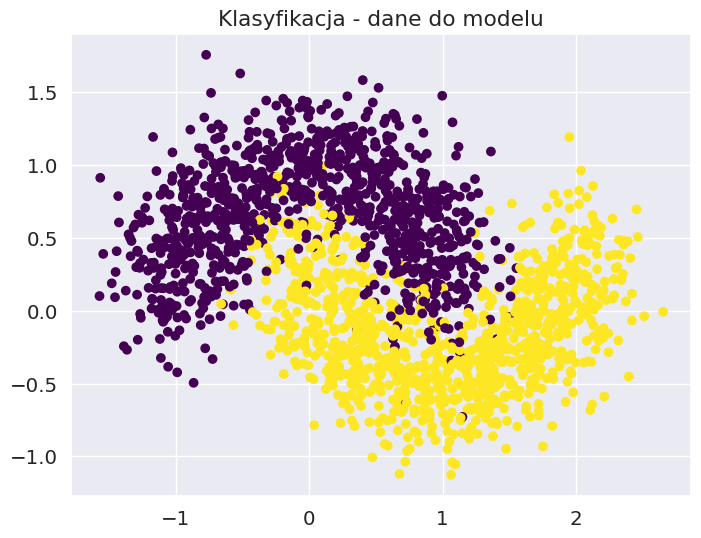

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df.x1, df.x2, c=df.target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [8]:
for i in [X_train, X_test, y_train, y_test ]:
  print(i.shape)

(1400, 2)
(600, 2)
(1400,)
(600,)


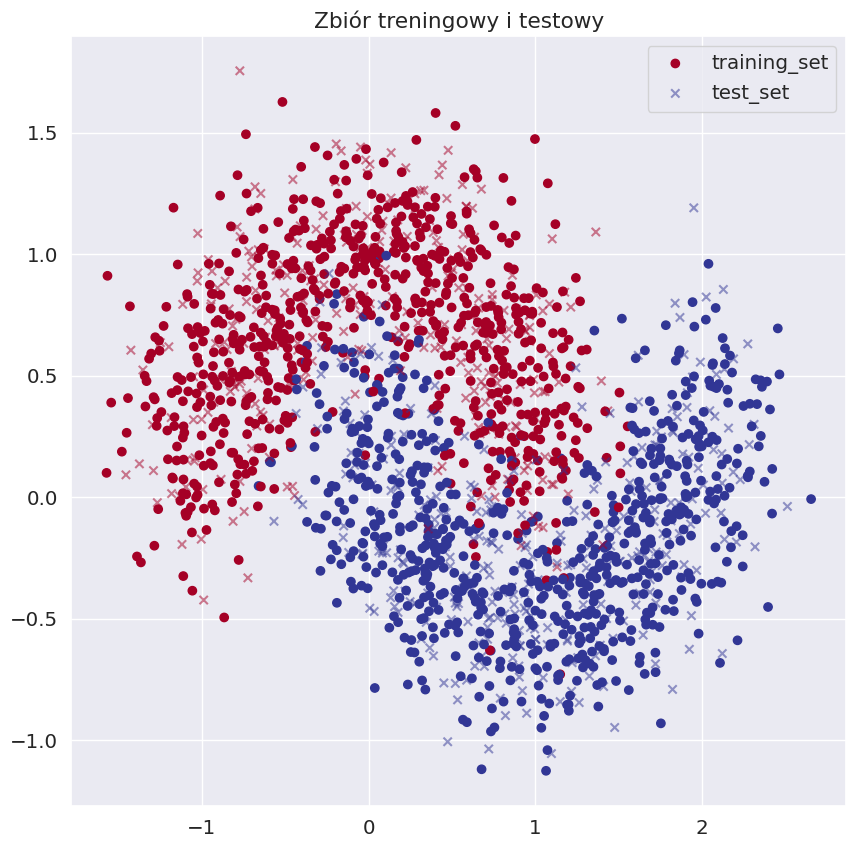

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

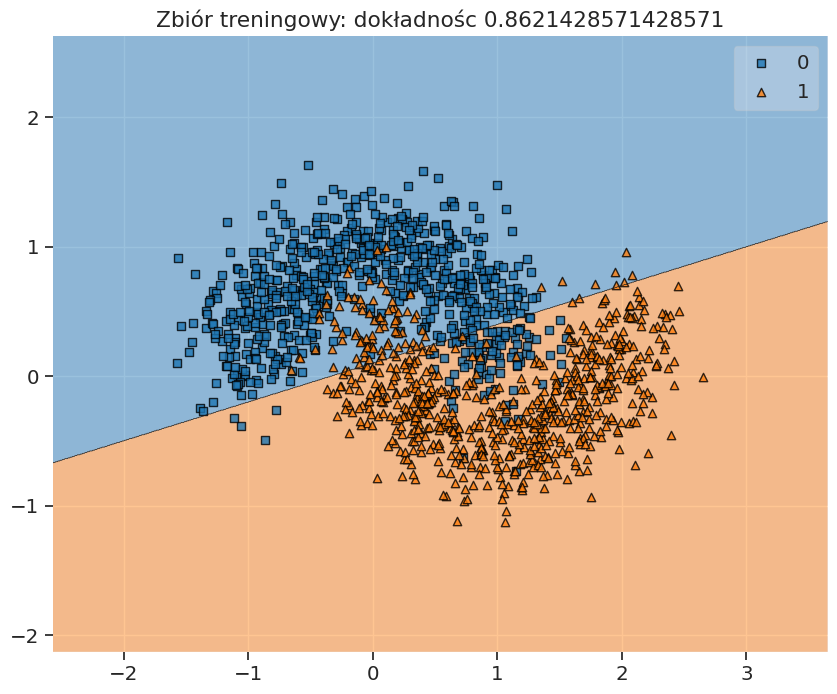

In [11]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_train, y_train)}")
plt.show()

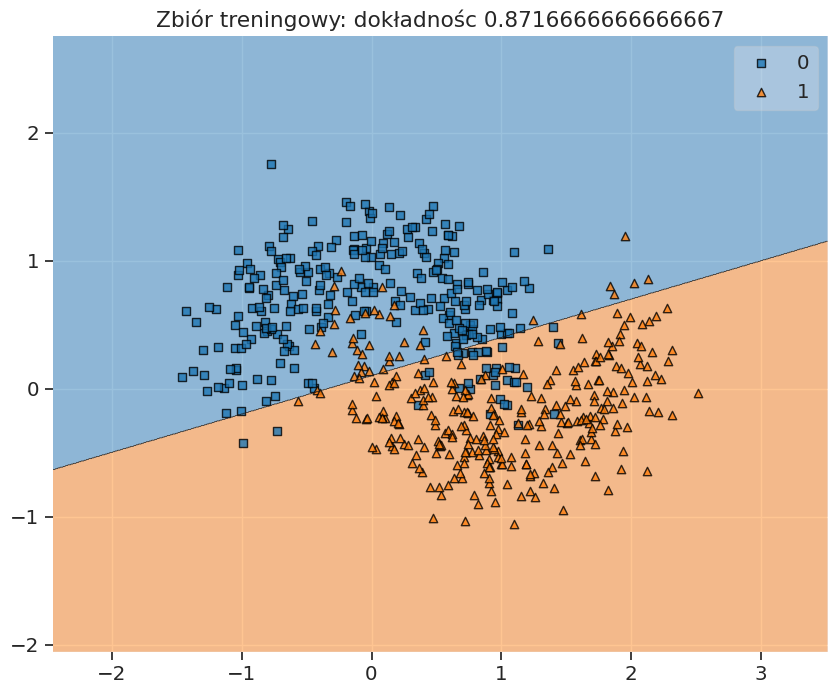

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_test, y_test)}")
plt.show()

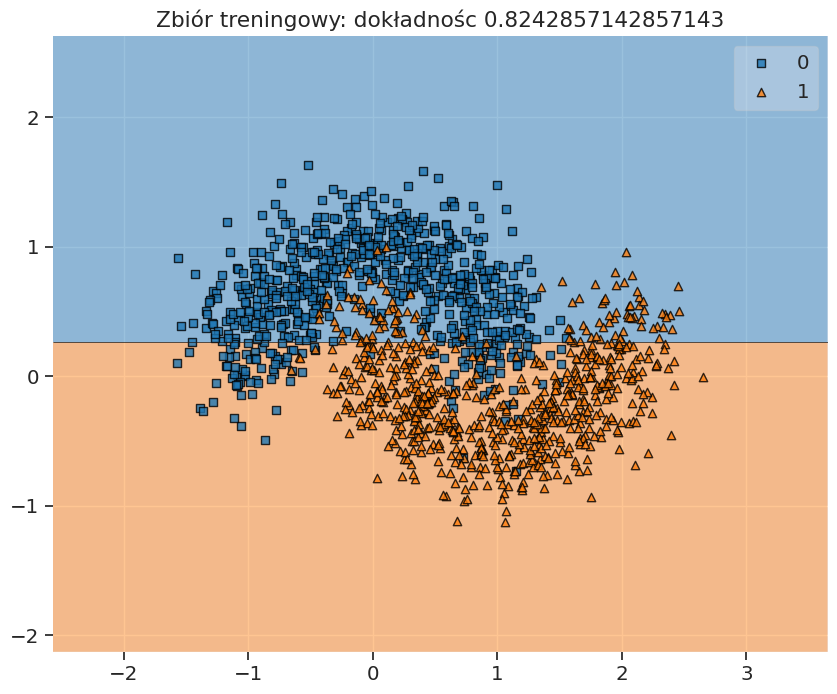

In [13]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_train, y_train)}")
plt.show()

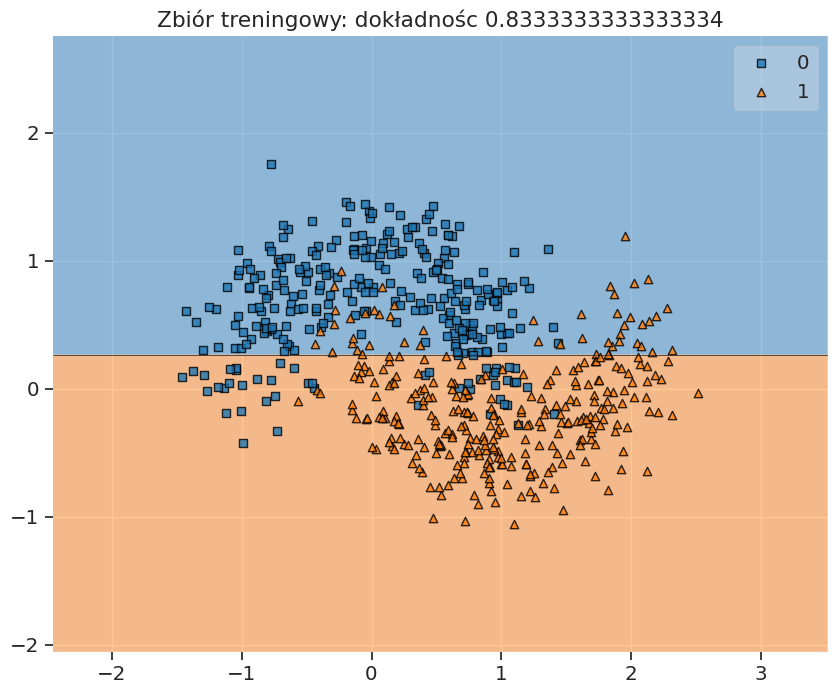

In [14]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_test, y_test)}")
plt.show()

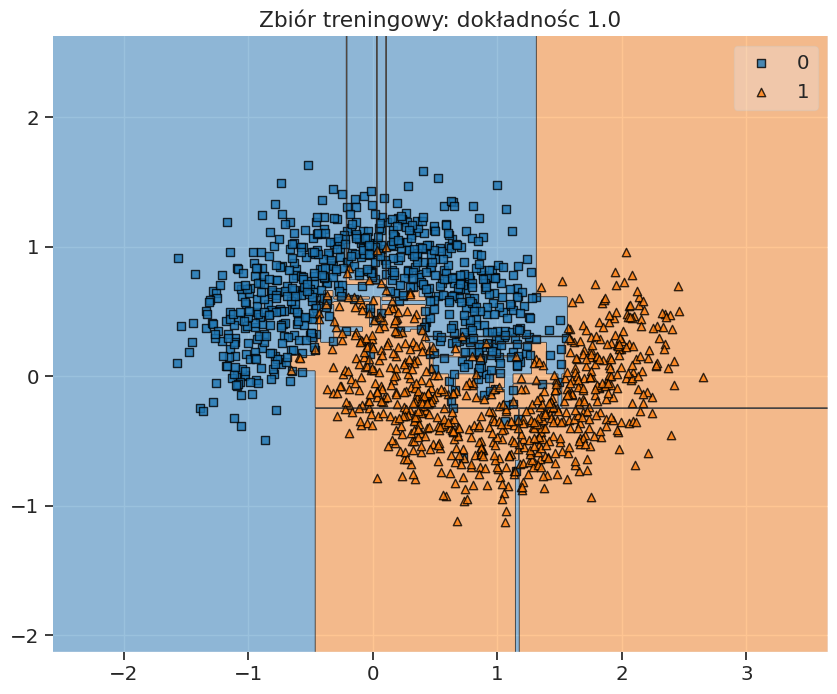

In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()  # overfitting no params
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_train, y_train)}")
plt.show()

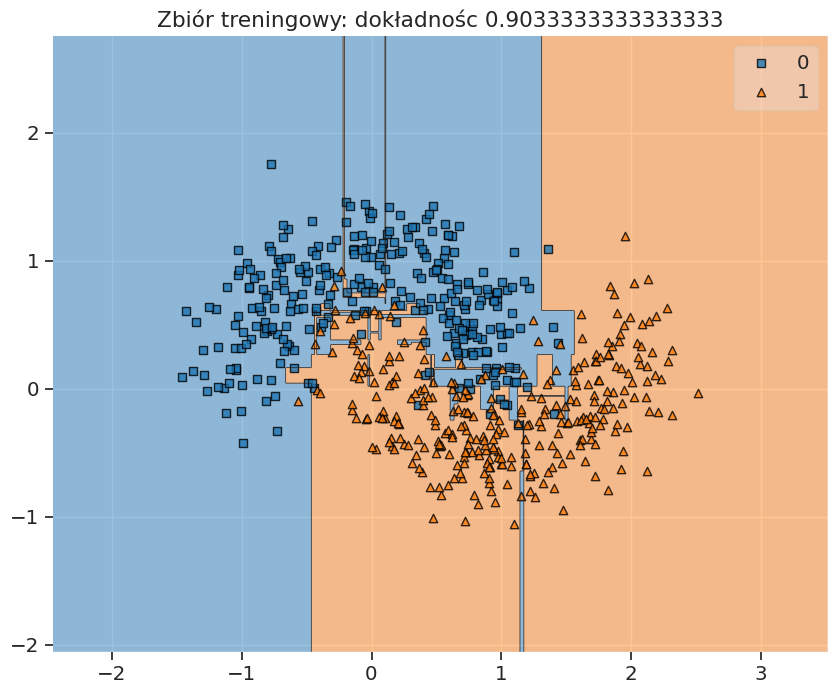

In [16]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f"Zbiór treningowy: dokładnośc {classifier.score(X_test, y_test)}")
plt.show()